# Modelling the emission of alphaparticles as a Poisson distribution

## Summary

### Data

count, `str` :
number of alpha-particle emissions

observed, `int` :
observed frequency of each number of alpha-particles

### Method

- Data modelled using the Poisson distribution
- Sample mean number of observations calculated, used instead of the
  unknown population mean
- Expected number of each emission count calculated
- Counts 11, 12, 13+ had expected values < 5, so they were combined
  into a single new category (11+) and expected number recalculated
- Observed and expected frequencies plotted as a side-by-side plot
- Chi-square goodness-of-fit test used to test the hypothesis that the
  emissions of alpha-particles can be modelled by a Poisson
  distribution

### Summary results

```python
test_results{'chisq': 10.417, 'pval': 0.405, "dof": 11}
```

### Output

<!--Add path to FinishingM248-->

### Reference

No reference

-----

## Results

### Setup the notebook

In [1]:
# import packages and modules
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# set seaborn theme
sns.set_theme()

In [3]:
# change wkdir and import the data
os.chdir("..")
data = pd.read_csv("data\\alpha_particles.csv")
obs_x = data["observed"]

### Preview the data

In [4]:
data

,count,observed
0,0,57
1,1,203
2,2,383
3,3,525
4,4,532
5,5,408
6,6,273
7,7,139
8,8,49
9,9,27


### Get expected number of observations

#### Declare `X`, number of emissions

This will be used to generate the expected number of emissions.
We cannot use the `count` column as it is not a column of `int`.

In [5]:
x = np.arange(start=0, stop=14)

#### Calculate weighted mean

In [6]:
mu = (x * obs_x).sum() / obs_x.sum()
mu

3.8767228177641653

#### Construct the Poisson model

Array `pmf_x` will not initially be correct, as the final entry will
show **P(X=13)**, not **P(X>=13)**, so we replace it.

In [7]:
pois_model = stats.poisson(mu)
pmf_x = pois_model.pmf(x)
pmf_x[13] = 1 - pois_model.cdf(12)
# check
pmf_x.sum() == 1

True

#### Generate expected number of observations

In [8]:
exp_x = pmf_x * obs_x.sum()
data["expected"] = exp_x
# check
data.query('expected < 5')

,count,observed,expected
11,11,4,4.029864
12,12,2,1.301889
13,>= 13,0,0.532207


Not all expected values are greater than 5. 
Combine counts `11, 12, 13+ -> 11+`.

In [9]:
x2 = pd.Series(np.arange(start=0, stop=12))
x2[11] = ">=11"

In [10]:
obs_x2 = obs_x[0:11]
obs_x2[11] = obs_x[11:].sum()

In [11]:
exp_x2 = pd.Series(exp_x[0:11])
exp_x2[11] = exp_x[11:].sum()

In [12]:
data2 = pd.DataFrame(
    {'count': x2, 'observed': obs_x2, 'expected': exp_x2})

In [13]:
data2

,count,observed,expected
0,0,57,54.117016
1,1,203,209.796672
2,2,383,406.661773
3,3,525,525.504992
4,4,532,509.309298
5,5,408,394.890196
6,6,273,255.146639
7,7,139,141.304685
8,8,49,68.474887
9,9,27,29.495351


### Visualise the data

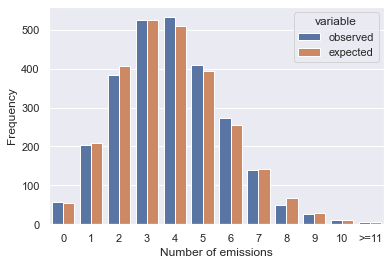

In [17]:
# side-by-side barchart
malpha = data2.melt(id_vars="count", value_vars=["observed", "expected"])
ax = sns.barplot(data=malpha, x="count", y="value", hue="variable")
ax.set(xlabel="Number of emissions", ylabel="Frequency")
os.chdir("figures")
plt.savefig("alpha_fig1")
os.chdir("..")
plt.show()

### Run the hypothesis test

In [18]:
chisq, pval = stats.chisquare(f_obs=obs_x2, f_exp=exp_x2, ddof=1)

In [19]:
chisq, pval

(10.417085300106228, 0.4046937192262659)